# 6-1. **PyTorch**

[PyTorch](https://pytorch.org/) is an open source machine learning library used for applications such as natural language processing and computer vision. It is based on the [Torch](http://torch.ch/) library.

Before we use Pytorch it is (obviously) neccessary to understand what Pytorch is. Let's start from the two core concepts: **Tensor**, **(Computational) Graph** and **Automatic Differentiation**


## Tensor
A tensor is a generalization of vectors and matrices to potentially higher dimensions. It is the primary data structure used by neural networks. Normally, we can use **nd**-tensor to call any of its instances where **nd** stands for **n** **dimensional**.

There are three basic attributes we need to know about tensors:
*   *Rank*: The number of dimensions present within the tensor. e.g. rank-2 tensor means 2d-tensor.
*   *Axes*: Used to refer to a specific dimensions. The number of axes equals to the number of dimensions. The length of an axis represents the number of elements running along this axis.
*   *Shape*: Formed by the length of each axis. e.g. shape(1,2) means a 2d-tensor with the first axis of length 1 and the second axis of length 2.


![Tensor_Rank](https://drive.google.com/uc?id=1o5wulLHGxUuPxH3t3xfV8U7d2CrsL1oG)


A [torch.Tensor](https://pytorch.org/docs/stable/tensors.html) (tensor in PyTorch) has the following key properties :
*   *torch.dtype*: an object representing the data type of a torch.Tensor. e.g. torch.float32
*   *torch.device*: an object representing the device on which a torch.Tensor is or will be allocated. e.g. CPU or CUDA (GPU)
*   *torch.layout*: an object representing the memory layout of a torch.Tensor.

More details with illustrative examples can be found [here](https://pytorch.org/docs/stable/tensor_attributes.html#tensor-attributes-doc)




## Computational Graph and Automatic Differentiation
PyTorch uses (directed acyclic) computational graphs  to graph the functional operations that are applied to tensors inside neural networks so as to computationally calculate derivatives for the network optimization. In graphs, the nodes are Tensors while the eages are functions that produce output Tensors from input Tensors (e.g. summation, mutiplication). Those graphs enable PyTorch to do the automatic differentiation for us, i.e. it can automatically calculate the derivatives that are needed for network optimization. We will learn more about it through pratical examples in following sections.

Specifically, PyTorch generates the computational graph on the fly as when operations are created during forward passes in neural networks, which is refered as dynamic computational graph. This is the one of the main differences between PyTorch and TensorFlow which uses static computational graphs.  



## Importing PyTorch library
[Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb) has torch library installed as default so you just need to import it as below:

In [ ]:
import torch
print(torch.__version__) #check version

2.0.1+cu118


## Tensor creation
With PyTorch, we will be implementing lots of models. To get started, let's  have a look at how to create a tensor.

We can creating tensors **with numerical data**, typically numpy arrays.

In [ ]:
import numpy as np

# Scalar (0 Rank)
data = torch.tensor(1)
print(data.shape)

# Vector (1 Rank)
data = np.array([1,2])
data = torch.Tensor(data)
print(data.shape)

# Matrix (2 Rank)
data = np.ones((2,2,))
data = torch.Tensor(data)
print(data.shape)

# Cube (3 Rank)
data = np.ones((2,2,2))
data = torch.Tensor(data)
print(data.shape)

# Vector of cubes (4 Rank)
data = np.ones((2,2,2,2))
data = torch.Tensor(data)
print(data.shape)

torch.Size([])
torch.Size([2])
torch.Size([2, 2])
torch.Size([2, 2, 2])
torch.Size([2, 2, 2, 2])


Notice that although both torch.Tensor() and torch.tensor() can be used to are used to generate tensors, there are some differences:

*   uppercase t VS. lowercase T (obviously)
*   torch.Tensor() is the constructor of the torch.Tensor class while the torch.tensor() is a factory function that constructs torch.Tensor objects and return them to the caller
*   torch.Tensor() can return an empty tensor without specifying incoming data while torch.tensor() with no input data will prouduce a TypeError (you can try)
*   torch.Tensor uses the default dtype 'float32' while the torch.tensor() choose the same dtype based on the incoming data (type inference), this can be easily illustrated thorugh following example:



In [ ]:
data = np.array([1,2])
print(data.dtype)

data_T = torch.Tensor(data)
print(data_T)
print(data_T.dtype)
# get the torch default data type, which can also be changed through 'torch.set_default_dtype(dtype)'
print(data_T.dtype==torch.get_default_dtype())
print()

data_t = torch.tensor(data)
print(data_t)
print(data_t.dtype)
print()

# we can also specify a datatype with torch.tensor()
data_t = torch.tensor(data, dtype=torch.float64)
print(data_t)
print(data_t.dtype)

int64
tensor([1., 2.])
torch.float32
True

tensor([1, 2])
torch.int64

tensor([1., 2.], dtype=torch.float64)
torch.float64


Expect for torch.Tensor() and torch.tensor(), We can also use torch.as_tensor and torch.from_numpy

In [ ]:
# Create tensor using torch.as_tensor
data = np.ones((2,2,2))
data = torch.as_tensor(data)
print(data.shape)

# Create tensor using torch.from_numpy
data = np.ones((2,2,2,2))
data = torch.from_numpy(data)
print(data.shape)

torch.Size([2, 2, 2])
torch.Size([2, 2, 2, 2])


Alternatively, we can also create tensors **without data** using factory functions

In [ ]:
# torch.eye: Returns an identity matrix
torch.eye(2)

tensor([[1., 0.],
        [0., 1.]])

In [ ]:
# torch.zeros: Returns a tensor of given shape filled with all zeros
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
# torch.ones: Returns a tensor of given shape filled with all ones
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
# torch.rand: Returns a tensor of given shape filled with values drawn from a uniform distribution on [0, 1).
torch.rand(2,2)

tensor([[0.0405, 0.0083],
        [0.0595, 0.5401]])

More factory functions for tensor creation can be found [here](https://pytorch.org/cppdocs/notes/tensor_creation.html#factory-functions)

## Basic tensor operations

The list of operations with examples can be found [here](https://pytorch.org/docs/stable/torch.html#math-operations). Please go through and try to practice yourself with examples before you move on. You don't need to remember all of them, you can easily refer back when needed.

## Simple Linear Regression

![Linear_Regression](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/320px-Linear_regression.svg.png)

The following code implements a simple linear regression algorithm.



### Linear Regression from scratch

Prepare data

In [ ]:
import numpy
import matplotlib.pyplot as plt
import torch

# training data
x_training = numpy.asarray([1, 2, 5, 8, 9, 12, 14, 16, 18, 20])
y_training = numpy.asarray([1500, 3500, 7200, 11000, 12500, 18500, 22000, 24500, 28000, 30500])

x_test = numpy.asarray([3, 7, 13, 15, 19])
y_test = numpy.asarray([4400, 10000, 19500, 23500, 29000])

# creating tensor for trainig from training data
x_data = torch.from_numpy(x_training)
y_data = torch.from_numpy(y_training)
x_test_data = torch.from_numpy(x_test)
y_test_data = torch.from_numpy(y_test)


 Once the dataset is prepared, we can start defining our model architecture

 Let's first build it from scratch so as to gain a clear understanding about how the automatic differentiation works



In [ ]:
# Define weights and biases
weight = torch.tensor(numpy.random.randn(), requires_grad=True)
bias = torch.tensor(numpy.random.randn(), requires_grad=True)
print(weight)
print(bias)

tensor(0.7443, requires_grad=True)
tensor(0.1684, requires_grad=True)


Note that we set 'requires_grad=True' above, which turns on the automatic gradient computation for weight and bias

In [ ]:
# Define the model
# Hypothesis = W * X + b (Linear Model)
def linearRegression(x):
  return x * weight + bias

In [ ]:
# Generate predictions and compare with ground truth labels
# As we can see, we randomly initialise the weight and bias, the model does not predict properly at the moment
predictions = linearRegression(x_data)
print(predictions)
print(y_data)

tensor([ 0.9126,  1.6569,  3.8896,  6.1224,  6.8666,  9.0994, 10.5879, 12.0764,
        13.5649, 15.0534], grad_fn=<AddBackward0>)
tensor([ 1500,  3500,  7200, 11000, 12500, 18500, 22000, 24500, 28000, 30500])


In [ ]:
# Define loss function
# here we use mean squared error (MSE)
def mse(x1, x2):
  diff = x1 - x2
  return torch.sum(diff*diff)/diff.numel()

In [ ]:
# Compute loss
# As we all know, the lower, the better
loss = mse(predictions, y_data)
print(loss)

tensor(3.4809e+08, grad_fn=<DivBackward0>)


As is mentioned, PyTorch automatically compute the gradient/derivative of the loss (with regard to the weight and bias here). This was enabled when we set `requires_grad=True` to them.

All we need to do now is to call the backward() over our loss, which will trigger the automatical computation of gradients based on the chain rule.

In [ ]:
# Compute gradients
loss.backward()

After the backward passing, the gradients are stored in the .grad property of the involved tensors. Let's have a look.

In [ ]:
# Gradient for weight
print(weight)
print(weight.grad)
print()

# Gradient for bias
print(bias)
print(bias.grad)

tensor(0.7443, requires_grad=True)
tensor(-455973.9375)

tensor(0.1684, requires_grad=True)
tensor(-31824.0352)


Now we can easily adjust the weight and bias using the gradients.

We need to reset the gradients after before next forward pass, because PyTorch accumulates gradients.

In [ ]:
# We do not want gradient for the updation operation
# There will not be automatic gradient computation within the torch.no_grad()

with torch.no_grad():
  weight -= weight.grad * 1e-5
  bias -= bias.grad * 1e-5
  # remember to reset the gradients
  weight.grad.zero_()
  bias.grad.zero_()
print(weight)
print(bias)


tensor(5.3040, requires_grad=True)
tensor(0.4866, requires_grad=True)


In [ ]:
print(weight.grad)
print(bias.grad)

tensor(0.)
tensor(0.)


Let's predict and compute loss again. The loss should be lower with new weights and biases

In [ ]:
predictions = linearRegression(x_data)
loss = mse(predictions, y_data)
print(loss)

tensor(3.4600e+08, grad_fn=<DivBackward0>)


Hope you now have an initial clear understanding of how automatic gradient computing works.

Let's start training the model for multiple epochs.

We can just simply create python loop to do it.

Epoch: 0000 loss= 343929472.00000000 W= 9.8500 b= 0.8039
Epoch: 0200 loss= 103508824.00000000 W= 691.9662 b= 48.2820
Epoch: 0400 loss= 31364316.00000000 W= 1065.6399 b= 74.0595
Epoch: 0600 loss= 9715397.00000000 W= 1270.3512 b= 87.9498
Epoch: 0800 loss= 3218939.00000000 W= 1382.5073 b= 95.3287
Epoch: 1000 loss= 1269432.12500000 W= 1443.9612 b= 99.1410
Epoch: 1200 loss= 684327.37500000 W= 1477.6421 b= 100.9997
Epoch: 1400 loss= 508664.00000000 W= 1496.1083 b= 101.7884
Epoch: 1600 loss= 455863.84375000 W= 1506.2397 b= 101.9913
Epoch: 1800 loss= 439930.81250000 W= 1511.8057 b= 101.8736
Epoch: 2000 loss= 435059.06250000 W= 1514.8705 b= 101.5804
Epoch: 2200 loss= 433507.18750000 W= 1516.5657 b= 101.1914
Epoch: 2400 loss= 432952.00000000 W= 1517.5104 b= 100.7501
Epoch: 2600 loss= 432695.43750000 W= 1518.0439 b= 100.2803
Epoch: 2800 loss= 432529.59375000 W= 1518.3523 b= 99.7953
Epoch: 3000 loss= 432390.15625000 W= 1518.5364 b= 99.3022
Epoch: 3200 loss= 432260.09375000 W= 1518.6531 b= 98.8048


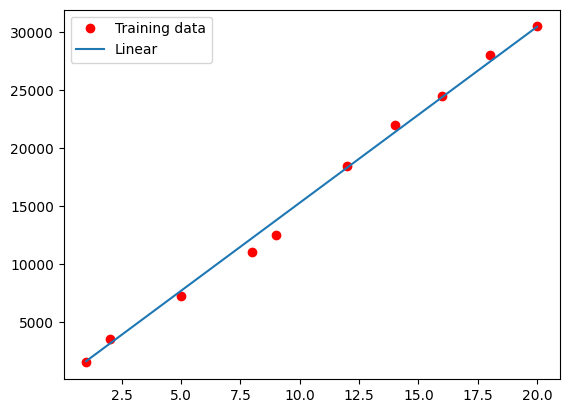

Testing loss= 219180.656250000
Absolute mean square loss difference: 211945.687500000


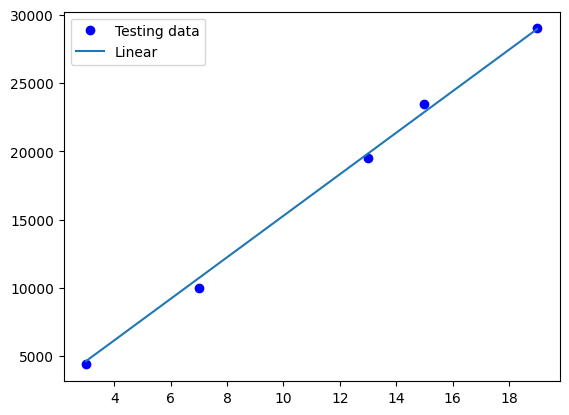

In [ ]:
# An epoch is one iteration over the entire input data
no_of_epochs = 5000
# How often you want to display training info.
display_interval = 200

for epoch in range(no_of_epochs):
  predictions = linearRegression(x_data)
  loss = mse(predictions, y_data)
  loss.backward()
  with torch.no_grad():
    weight -= weight.grad * 1e-5
    bias -= bias.grad * 1e-5
    weight.grad.zero_()
    bias.grad.zero_()
  if epoch % display_interval == 0 :
      # calculate the cost of the current model
      predictions = linearRegression(x_data)
      loss = mse(predictions, y_data)
      print('Epoch:', '%04d' %(epoch), 'loss=', '{:.8f}'.format(loss), 'W=', '{:.4f}'.format(weight), 'b=',  '{:.4f}'.format(bias))

print('=========================================================')
training_loss = mse(linearRegression(x_data), y_data)
print('Optimised:', 'lost=', '{:.9f}'.format(training_loss.data), \
              'W=', '{:.9f}'.format(weight.data), 'b=', '{:.9f}'.format(bias.data))

# Plot training data on the graph
plt.plot(x_training, y_training, 'ro', label='Training data')
plt.plot(x_training, weight.data * x_training + bias.data, label='Linear')
plt.legend()
plt.show()

# Calculate testing loss
testing_loss = mse(linearRegression(x_test_data), y_test_data)
print('Testing loss=', '{:.9f}'.format(testing_loss.data))
print('Absolute mean square loss difference:', '{:.9f}'.format(abs(
      training_loss.data - testing_loss.data)))

# Plot testing data on the graph
plt.plot(x_test, y_test, 'bo', label='Testing data')
plt.plot(x_test, weight.data * x_test + bias.data, label='Linear')
plt.legend()
plt.show()

### Linear Regression using PyTorch built-ins

Prepare data

In [ ]:
import numpy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# training data: this time we use 2d array
# Assuming we have 90 samples of 10 featues about a house condition, such as bedroom number, distance to city center etc.
# and will predict the house price
x_data = torch.randn(90, 10)
y_data = torch.randn(90, 1)

# testing data:
x_test_data = torch.randn(10, 10)
y_test_data = torch.randn(10, 1)

This time we don't need to initialize the weight and bias manually. Instead, we will define the model using the built-in [torch.nn.Linear](https://pytorch.org/docs/stable/nn.html#linear).

[**torch.nn**](https://pytorch.org/docs/stable/nn.html) is a subpackage that contains modules and extensible classes for us to build neural networks.



In [ ]:
# Define model
linearRegression = nn.Linear(10,1)
print(linearRegression.weight)
print(linearRegression.bias)

Parameter containing:
tensor([[-0.0350, -0.2629, -0.0799, -0.2165,  0.1827,  0.3146,  0.3147,  0.0170,
         -0.0853, -0.0503]], requires_grad=True)
Parameter containing:
tensor([0.2934], requires_grad=True)


Similarly, we don't mannually updating the weight and bias using gradients by ouselves. Instead, we will use the optimizer optim.SGD.

[**torhc.optim**](https://pytorch.org/docs/stable/optim.html) is a subpackage that contains the standard optimization operations like Adam and SGD.



In [ ]:
# Define optimizer
# Just pass the model parameters to be updated and specify the learning rate when calling optim.SGD
# SGD optimizer in PyTorch actually is Mini-batch Gradient Descent with momentum.
# In this case, as the batch size of our model is N, SGD here is actually Batch Gradient Descent.
optimizer = torch.optim.SGD(linearRegression.parameters(), lr=1e-5)

Again, we use the built-in loss function mse_loss instead of defining it mannually.

We will need the [**torch.nn.functional**](https://pytorch.org/docs/stable/nn.functional.html) interface, which contains typical operations used for building neural networks such as convolution operations, activation functions and loss functions we need here.

In [ ]:
# Import nn.functional
import torch.nn.functional as F

# Define the loss function
loss_func = F.mse_loss

# Calculate loss
loss = loss_func(linearRegression(x_data), y_data)
print(loss)

tensor(2.0411, grad_fn=<MseLossBackward0>)


Train the model

In [ ]:
# An epoch is one iteration over the entire input data
no_of_epochs = 5000
# How often you want to display training info.
display_interval = 200

for epoch in range(no_of_epochs):
  predictions = linearRegression(x_data)
  loss = loss_func(predictions, y_data)
  loss.backward()
  optimizer.step() #call step() to automatically update the parameters through our defined optimizer, which can be called once after backward()
  optimizer.zero_grad() #reset the gradient as what we did before
  if epoch % display_interval == 0 :
      # calculate the cost of the current model
      predictions = linearRegression(x_data)
      loss = loss_func(predictions, y_data)
      print('Epoch:', '%04d' % (epoch), 'loss=', '{:.8f}'.format(loss))

print('=========================================================')
training_loss = mse(linearRegression(x_data), y_data)
print('Optimised:', 'lost=', '{:.9f}'.format(training_loss.data))


# Calculate testing loss
testing_loss = loss_func(linearRegression(x_test_data), y_test_data)
print('Testing loss=', '{:.9f}'.format(testing_loss.data))
print('Absolute mean square loss difference:', '{:.9f}'.format(abs(
      training_loss.data - testing_loss.data)))

Epoch: 0000 loss= 2.04106092
Epoch: 0200 loss= 2.03085971
Epoch: 0400 loss= 2.02075815
Epoch: 0600 loss= 2.01075578
Epoch: 0800 loss= 2.00085092
Epoch: 1000 loss= 1.99104309
Epoch: 1200 loss= 1.98133135
Epoch: 1400 loss= 1.97171474
Epoch: 1600 loss= 1.96219110
Epoch: 1800 loss= 1.95275891
Epoch: 2000 loss= 1.94341874
Epoch: 2200 loss= 1.93416917
Epoch: 2400 loss= 1.92500949
Epoch: 2600 loss= 1.91593921
Epoch: 2800 loss= 1.90695703
Epoch: 3000 loss= 1.89806235
Epoch: 3200 loss= 1.88925374
Epoch: 3400 loss= 1.88053083
Epoch: 3600 loss= 1.87189233
Epoch: 3800 loss= 1.86333776
Epoch: 4000 loss= 1.85486555
Epoch: 4200 loss= 1.84647489
Epoch: 4400 loss= 1.83816576
Epoch: 4600 loss= 1.82993770
Epoch: 4800 loss= 1.82178891
Optimised: lost= 1.813758492
Testing loss= 2.015377283
Absolute mean square loss difference: 0.201618791
